# Anemia Classification using HOG + Decision Tree

This notebook performs classification of anemia using hemoglobin images taken from the lower eyelid.
The pipeline includes image preprocessing, feature extraction using HOG (Histogram of Oriented Gradients),
and classification using a Decision Tree model.

**Author:** Indra Eka Mandriana  
**Goal:** Predict anemia status based on eyelid images using Machine Learning  


## Library Installation

In [48]:
!pip install -q scikit-image matplotlib mlxtend pytictoc

##  Import Libraries

In [49]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import glob
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree as pohon
from pathlib import Path
from tqdm import tqdm
from pytictoc import TicToc
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree as sktree
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Setup Path dan Konfigurasi

In [50]:
# Atur path dataset
BASE_PATH = "/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix"
TRAIN_PATH = os.path.join(BASE_PATH, "Latih")
TEST_PATH = os.path.join(BASE_PATH, "Uji")

# Label (nama folder sebagai kelas)
CLASS_NAMES = ["anemia", "normal"]

# Ukuran resize gambar
IMG_HEIGHT = 128
IMG_WIDTH = 256

# Parameter HOG
CELL_SIZE = 8
BLOCK_SIZE = 8
ORI = 15


## Image Example

In [51]:
cell = 8
block = 8 # 2,2 4,4 8,8
ori = 15 #9, 12, 15, 18, 24, 30

P = 128 # panjang resize
L = 256 # lebar resize

(600, 1200, 3)


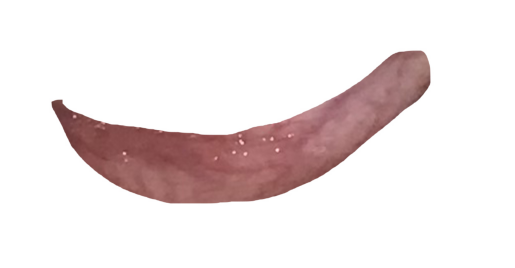

In [52]:
img = imread('/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/Latih/anemia/c10.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(128, 256, 3)


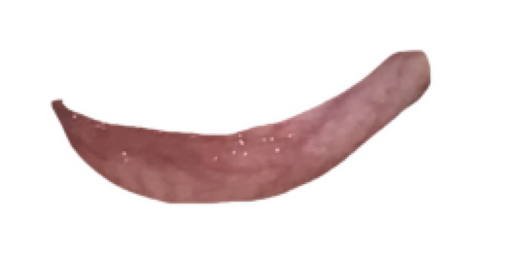

In [53]:
resized_img = resize(img, (128,256))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

(128, 256)


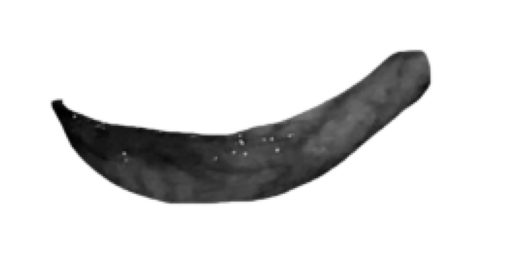

In [54]:
img_gray = rgb2gray(resized_img)
plt.axis("off")
plt.imshow(img_gray, cmap=plt.cm.gray)
print(img_gray.shape)

216000


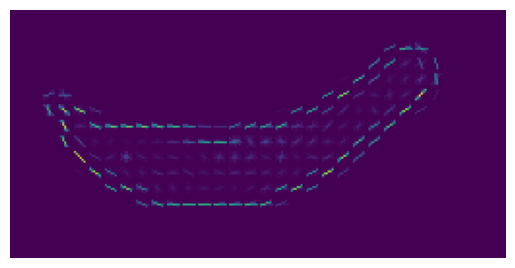

In [55]:
# melakukan fitur HOG
fd, hog_image = hog(img_gray, orientations=ori, pixels_per_cell=(cell,cell),
                	cells_per_block=(block,block), visualize=True )
plt.axis("off")
plt.imshow(hog_image)
print(len(fd))

##  Preprocessing & Feature Extraction Functions

In [56]:
WaktuKomputasi = TicToc()
WaktuKomputasi.tic()

from pathlib import Path
from skimage.io import imsave
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# folder_dir_latih = 'C:/Users/ghina/Desktop/smt8/TA/Latih/anemia'
# folder_dir_latih = 'C:/Users/ghina/Desktop/smt8/TA/70-30/Latih/anemia'
# folder_dir_latih = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/Latih/anemia'
# hog_features_latih_anemia = []

# images_latih = Path(folder_dir_latih).glob('*.jpg')
# for image in images_latih:
#     print(image.name)
#     # plt.imshow(image)
#     img2 = imread(image).astype(np.uint8)
#     # img2 =  cv2.imread(image.name, cv2.IMREAD_COLOR)

#     resized_img2 = resize(img2, (P,L))
#     img_gray2 = rgb2gray(resized_img2)
#     fd, hog_image2 = hog(img_gray2, orientations=ori, pixels_per_cell=(cell,cell),
#                 	cells_per_block=(block,block), visualize=True, block_norm='L2-Hys')
#     hog_features_latih_anemia.append(fd)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/HOG Latih/anemia/"+image.name,hog_image2)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Latih/anemia/"+image.name,hog_image2)
#     imsave("/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Latih/anemia/"+image.name,hog_image2)

In [57]:
# folder_dir_latih = 'C:/Users/ghina/Desktop/smt8/TA/Latih/normal'
# folder_dir_latih = 'C:/Users/ghina/Desktop/smt8/TA/70-30/Latih/normal'
# folder_dir_latih = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/Latih/normal'
# hog_features_latih_normal = []

# images_latih = Path(folder_dir_latih).glob('*.jpg')
# for image in images_latih:
#     print(image.name)
#     img2 = imread(image)
#     resized_img2 = resize(img2, (P,L))
#     img_gray2 = rgb2gray(resized_img2)
#     fd, hog_image2 = hog(img_gray2, orientations=ori, pixels_per_cell=(cell,cell),
#                 	cells_per_block=(block,block), visualize=True, block_norm='L2-Hys')
#     hog_features_latih_normal.append(fd)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/HOG Latih/normal/"+image.name,hog_image2)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Latih/normal/"+image.name,hog_image2)
#     imsave("/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Latih/normal/"+image.name,hog_image2)

In [58]:
from pathlib import Path
from skimage.io import imsave

# folder_dir_uji = 'C:/Users/ghina/Desktop/smt8/TA/Uji/anemia'
# folder_dir_uji = 'C:/Users/ghina/Desktop/smt8/TA/70-30/Uji/anemia'
# folder_dir_uji = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/Uji/anemia'
# hog_features_uji_anemia = []

# images_uji = Path(folder_dir_uji).glob('*.jpg')
# for image in images_uji:
#     print(image.name)
#     img2 = imread(image)
#     resized_img2 = resize(img2, (P,L))
#     img_gray2 = rgb2gray(resized_img2)
#     fd, hog_image2 = hog(img_gray2, orientations=ori, pixels_per_cell=(cell,cell),
#                 	cells_per_block=(block,block), visualize=True, block_norm='L2-Hys')
#     hog_features_uji_anemia.append(fd)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/HOG Uji/anemia/"+image.name,hog_image2)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Uji/anemia/"+image.name,hog_image2)
#     imsave("/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Uji/anemia/"+image.name,hog_image2)

In [59]:
# folder_dir_uji = 'C:/Users/ghina/Desktop/smt8/TA/Uji/normal'
# folder_dir_uji = 'C:/Users/ghina/Desktop/smt8/TA/70-30/Uji/normal'
# folder_dir_uji = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/Uji/normal'
# hog_features_uji_normal = []

# images_uji = Path(folder_dir_uji).glob('*.jpg')
# for image in images_uji:
#     print(image.name)
#     img2 = imread(image)
#     resized_img2 = resize(img2, (P,L))
#     img_gray2 = rgb2gray(resized_img2)
#     fd, hog_image2 = hog(img_gray2, orientations=ori, pixels_per_cell=(cell,cell),
#                 	cells_per_block=(block,block), visualize=True, block_norm='L2-Hys')
#     hog_features_uji_normal.append(fd)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/HOG Uji/normal/"+image.name,hog_image2)
# #     imsave("C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Uji/normal/"+image.name,hog_image2)
#     imsave("/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Uji/normal/"+image.name,hog_image2)

In [60]:
def getYourData(data, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['HOG Latih', 'HOG Uji']
    if not k_fold:
        path = "/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/" + data_type + "/"
        for i,f in enumerate(data):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (L,P))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("Terdapat " , j , " " , data_type.upper(), " Citra " , data[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/" + v + "/"
            for i,f in enumerate(data):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (L,P))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels

##  Dataset Preparation

In [61]:
# Pembagian Data
data = ['anemia' , 'normal'] # Klasifikasi Biner : Anemia & Normal

X_t, y_train =  getYourData(data, 'HOG Latih', print_n=True, k_fold=False) # menentukan X train dan Y train
X_test, y_test = getYourData(data, 'HOG Uji', print_n=True, k_fold=False) # menentukan X test dan Y test

# Pembagian Data
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t]) # Data traininig (fitur)
X_test = scaler.fit_transform([i.flatten() for i in X_test]) # Data teting (fitur)

# X_train = X_t
# X_test = X_test

Terdapat  35   HOG LATIH  Citra  ANEMIA
Terdapat  44   HOG LATIH  Citra  NORMAL
Terdapat  10   HOG UJI  Citra  ANEMIA
Terdapat  10   HOG UJI  Citra  NORMAL


In [62]:
# Menampilkan sampel data dalam bentuk grid
def plot_image_grid(images, nb_rows, nb_cols, figsize=(30, 30)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

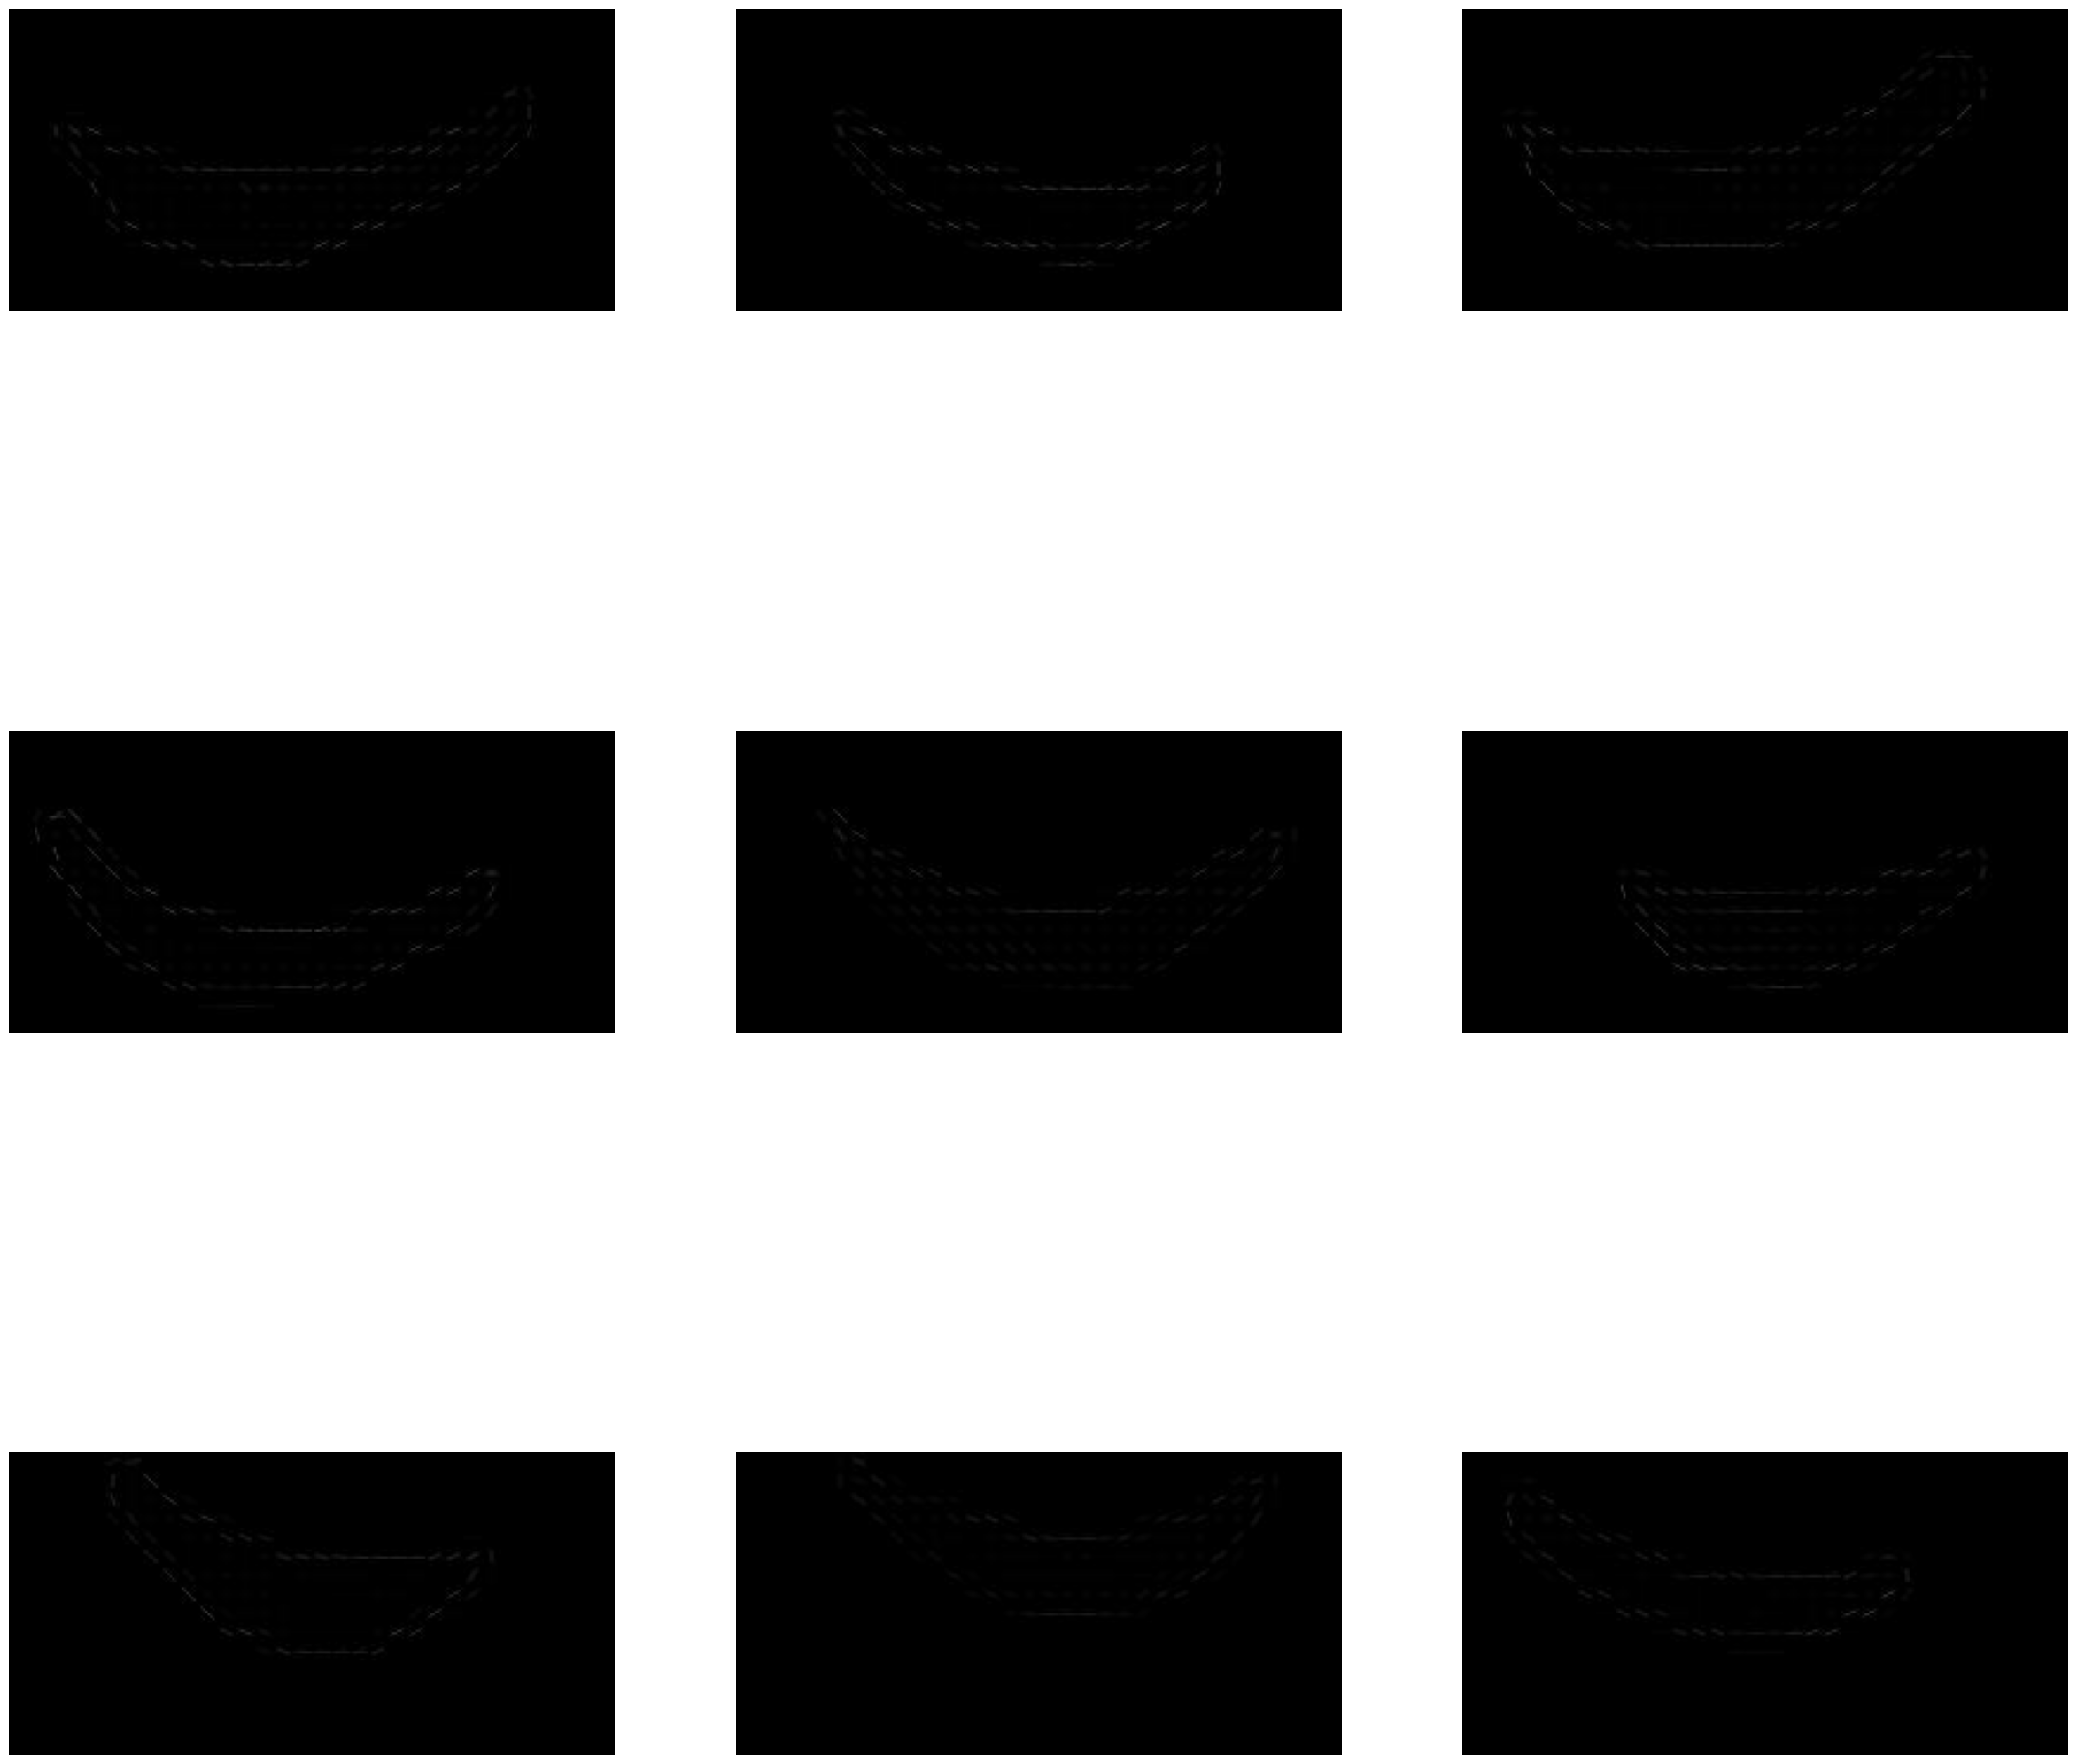

In [63]:
plot_image_grid(X_t[0:9], 3, 3)

In [64]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Fungsi ini untuk menampilkan confusion matrix.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = metrics.confusion_matrix(y_true, y_pred)
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=data, yticklabels=data,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

##  Model Training Function

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(y_pred, y_test, class_names):

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=class_names)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}\n")
    print("Classification Report:\n", report)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

    return acc, report


### Decision Tree

In [66]:
tree = DecisionTreeClassifier(criterion = "entropy",                # Criterion
                                  max_depth = 100,                     # Max Height of Tree
                                  min_samples_leaf = 2,              # Maximum Leaf samples
                                  random_state = 50)

model = tree.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(len(X_train[1]))

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Akurasi: {0:.2f}%".format(precision))
print("0 adalah anemia")
print("1 adalah normal")

from IPython.display import display
from pathlib import Path
from skimage.io import imsave


# folder_anemia = 'C:/Users/ghina/Desktop/smt8/TA/HOG Uji/anemia/'
# folder_anemia = 'C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Uji/anemia/'
folder_anemia = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Uji/anemia/'
nama_file = []
aktual = []

images_anemia = Path(folder_anemia).glob('*.jpg')
for image in images_anemia:
    nama_file.append(image.name)
    label = 'anemia'
    aktual.append(label)

# folder_normal = 'C:/Users/ghina/Desktop/smt8/TA/HOG Uji/normal/'
# folder_normal = 'C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Uji/normal/'
folder_normal = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Uji/normal/'

images_normal = Path(folder_normal).glob('*.jpg')
for image in images_normal:
    nama_file.append(image.name)
    label = 'normal'
    aktual.append(label)

Prediksi = np.array(y_pred)
PrediksiList = Prediksi.tolist()
Prediksi1 = []
for i in PrediksiList:
    if i == 0:
        hasil = 'anemia'
        Prediksi1.append(hasil)
    if i == 1:
        hasil = 'normal'
        Prediksi1.append(hasil)

Aktual = np.array(y_test)
AktualList = Aktual.tolist()
Aktual1 = []
for i in AktualList:
    if i == 0:
        hasil = 'anemia'
        Aktual1.append(hasil)
    if i == 1:
        hasil = 'normal'
        Aktual1.append(hasil)

dict = {'Nama File' : nama_file, 'Aktual' : Aktual1,
        'Prediksi' : Prediksi1}
dataframe = pd.DataFrame(dict)

display(dataframe)

98304
Akurasi: 85.00%
0 adalah anemia
1 adalah normal


,Nama File,Aktual,Prediksi
0,c84.jpg,anemia,anemia
1,c85.jpg,anemia,anemia
2,c86.jpg,anemia,anemia
3,c92.jpg,anemia,anemia
4,c95.jpg,anemia,anemia
5,c97.jpg,anemia,anemia
6,c99.jpg,anemia,normal
7,c100.jpg,anemia,anemia
8,c80.jpg,anemia,anemia
9,c89.jpg,anemia,normal


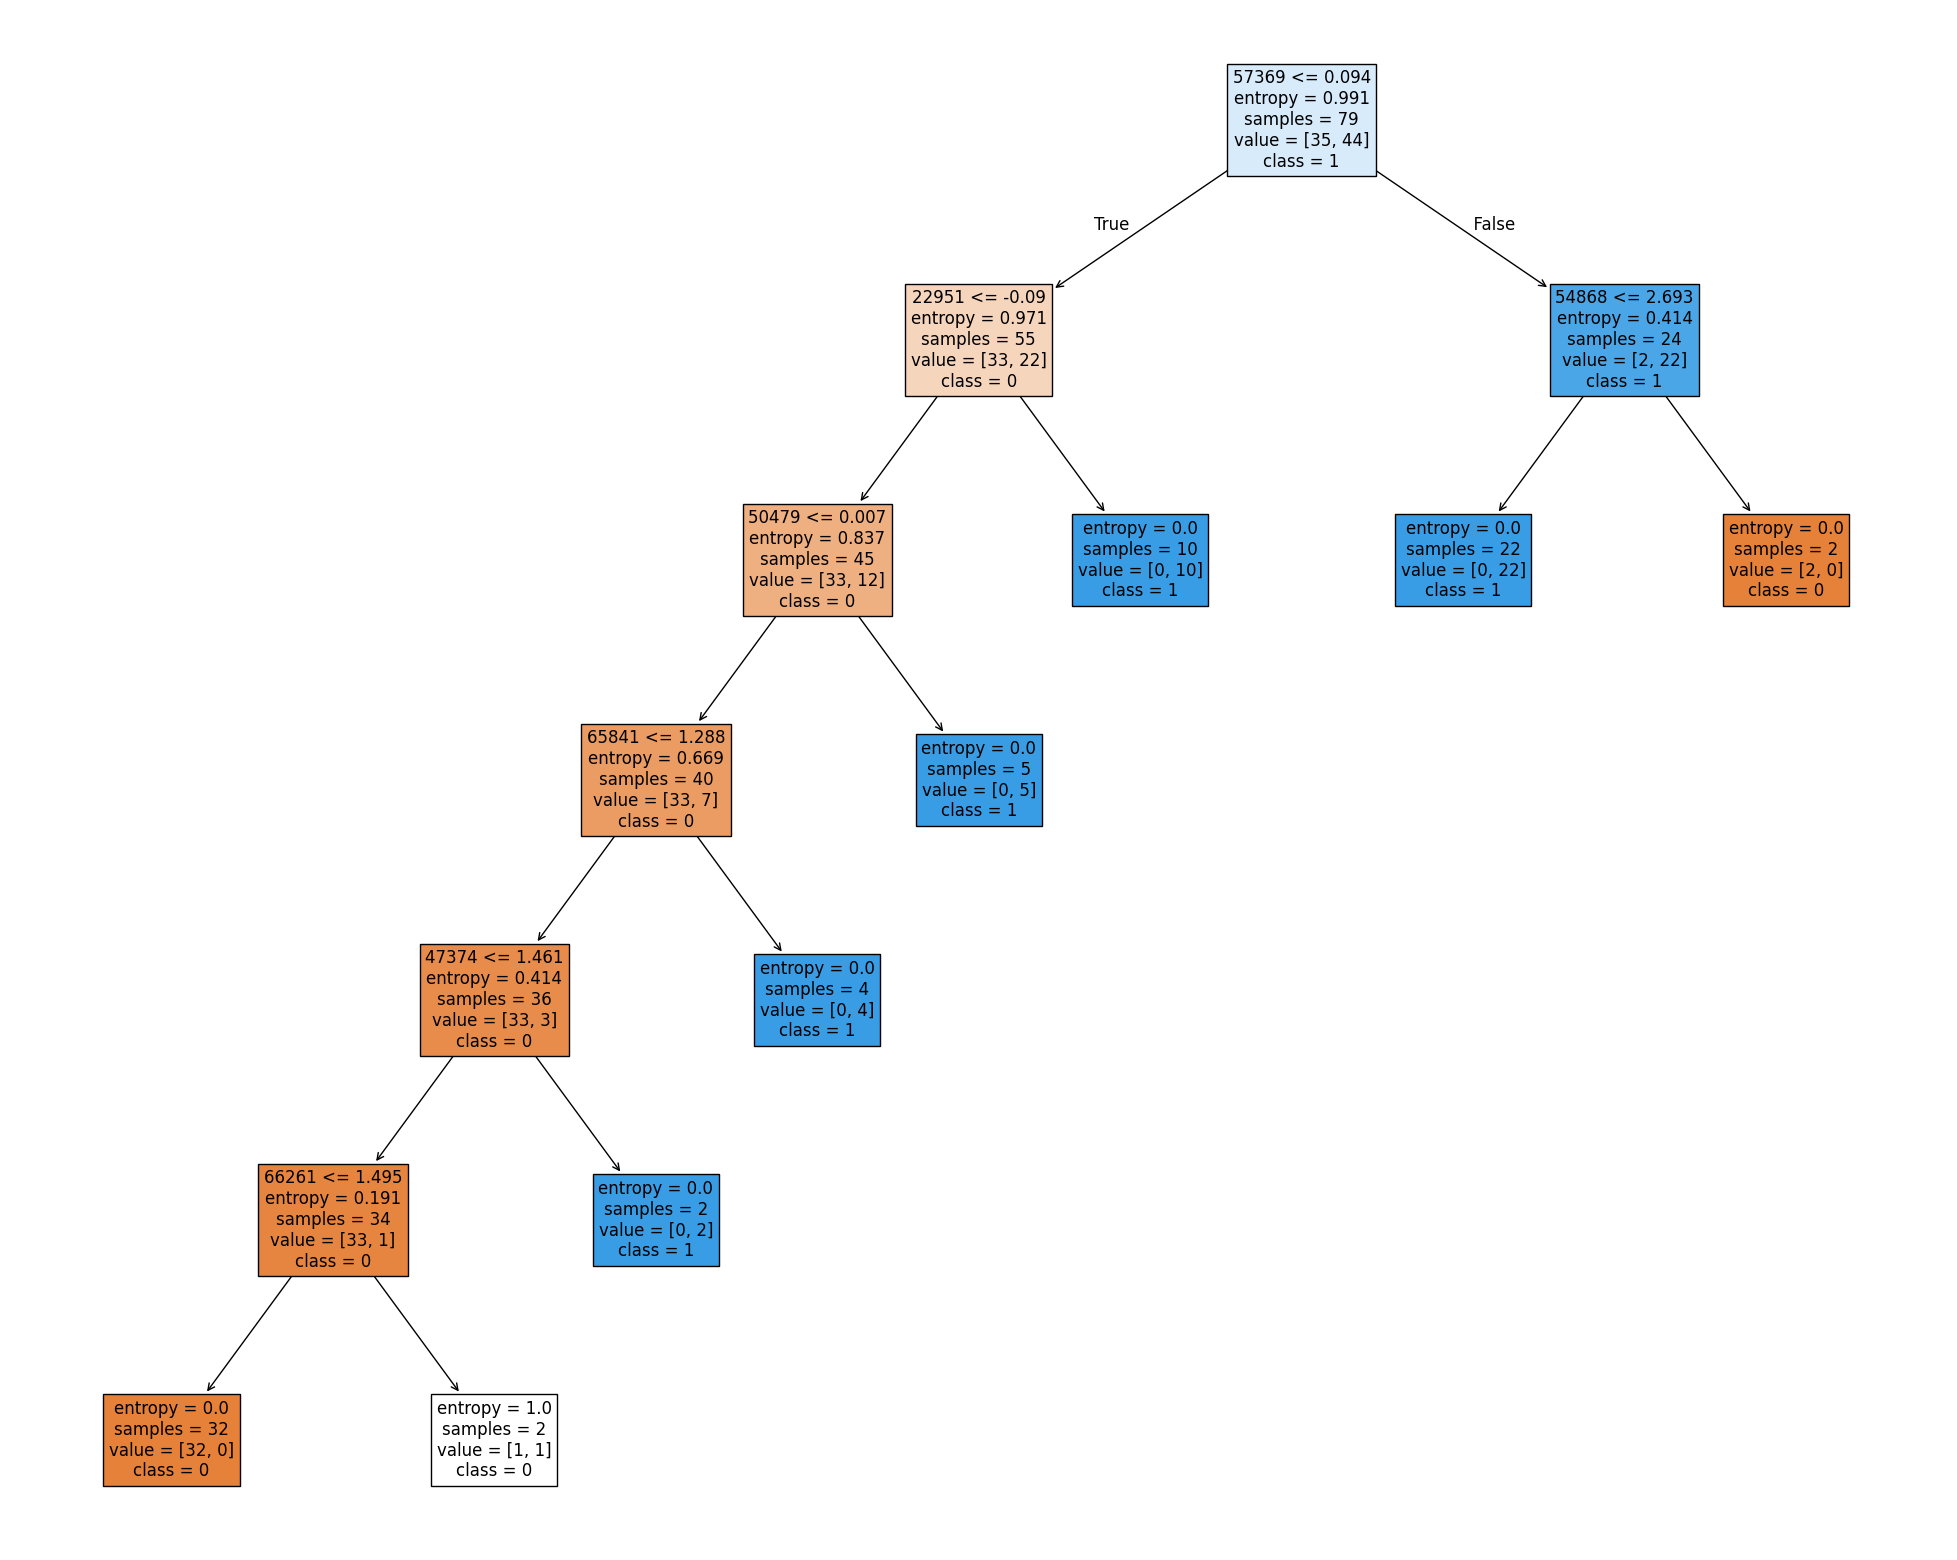

In [67]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_= (tree.plot_tree(model, fontsize=12,feature_names=df.columns, class_names=["0", "1"], filled=True))

[Text(0.6666666666666666, 0.9285714285714286, 'x[57369] <= 0.094\nentropy = 0.991\nsamples = 79\nvalue = [35, 44]'),
 Text(0.5, 0.7857142857142857, 'x[22951] <= -0.09\nentropy = 0.971\nsamples = 55\nvalue = [33, 22]'),
 Text(0.5833333333333333, 0.8571428571428572, 'True  '),
 Text(0.4166666666666667, 0.6428571428571429, 'x[50479] <= 0.007\nentropy = 0.837\nsamples = 45\nvalue = [33, 12]'),
 Text(0.3333333333333333, 0.5, 'x[65841] <= 1.288\nentropy = 0.669\nsamples = 40\nvalue = [33, 7]'),
 Text(0.25, 0.35714285714285715, 'x[47374] <= 1.461\nentropy = 0.414\nsamples = 36\nvalue = [33, 3]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[66261] <= 1.495\nentropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.08333333333333333, 0.07142857142857142, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.25, 0.07142857142857142, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.416666

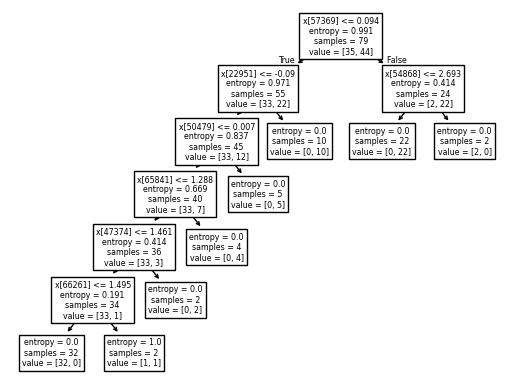

In [68]:
pohon.plot_tree(model)

In [69]:
print("Waktu Komputasi:")
WaktuKomputasi.toc()

Waktu Komputasi:
Elapsed time is 7.172014 seconds.


### Evaluation Decision Tree

Accuracy: 0.8500

Classification Report:
               precision    recall  f1-score   support

      anemia       0.89      0.80      0.84        10
      normal       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



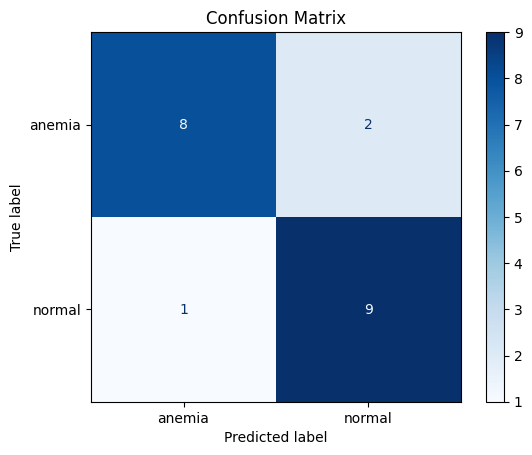

In [70]:
acc, report = evaluate_model(y_pred, y_test, CLASS_NAMES)

### SGD

In [71]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter = 1500)
model = sgd.fit(X_train,y_train)
# model = gnb.partial_fit(X_train, y_train, np.unique(y_train))

y_pred = model.predict(X_test)

# print(len(X_train[1]))

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Akurasi: {0:.2f}%".format(precision))
#cm , _ = plot_confusion_matrix(y_test, y_pred, classes=y_train, normalize=True, title='Confusion Matrix')
#plt.show()
print("0 adalah anemia")
print("1 adalah normal")

from IPython.display import display
from pathlib import Path
from skimage.io import imsave


# folder_anemia = 'C:/Users/ghina/Desktop/smt8/TA/HOG Uji/anemia/'
# folder_anemia = 'C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Uji/anemia/'
folder_anemia = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Uji/anemia/'
nama_file = []
aktual = []

images_anemia = Path(folder_anemia).glob('*.jpg')
for image in images_anemia:
    nama_file.append(image.name)
    label = 'anemia'
    aktual.append(label)

# folder_normal = 'C:/Users/ghina/Desktop/smt8/TA/HOG Uji/normal/'
# folder_normal = 'C:/Users/ghina/Desktop/smt8/TA/70-30/HOG Uji/normal/'
folder_normal = '/content/drive/MyDrive/Private_Class_Ghina-Decision_Tree /80-20 fix/HOG Uji/normal/'

images_normal = Path(folder_normal).glob('*.jpg')
for image in images_normal:
    nama_file.append(image.name)
    label = 'normal'
    aktual.append(label)

Prediksi = np.array(y_pred)
PrediksiList = Prediksi.tolist()
Prediksi1 = []
for i in PrediksiList:
    if i == 0:
        hasil = 'anemia'
        Prediksi1.append(hasil)
    if i == 1:
        hasil = 'normal'
        Prediksi1.append(hasil)

Aktual = np.array(y_test)
AktualList = Aktual.tolist()
Aktual1 = []
for i in AktualList:
    if i == 0:
        hasil = 'anemia'
        Aktual1.append(hasil)
    if i == 1:
        hasil = 'normal'
        Aktual1.append(hasil)

dict = {'Nama File' : nama_file, 'Aktual' : Aktual1,
        'Prediksi' : Prediksi1}
dataframe = pd.DataFrame(dict)

display(dataframe)

Akurasi: 95.00%
0 adalah anemia
1 adalah normal


,Nama File,Aktual,Prediksi
0,c84.jpg,anemia,anemia
1,c85.jpg,anemia,anemia
2,c86.jpg,anemia,anemia
3,c92.jpg,anemia,anemia
4,c95.jpg,anemia,anemia
5,c97.jpg,anemia,anemia
6,c99.jpg,anemia,anemia
7,c100.jpg,anemia,anemia
8,c80.jpg,anemia,anemia
9,c89.jpg,anemia,anemia



### Evaluation SGD

Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

      anemia       0.91      1.00      0.95        10
      normal       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



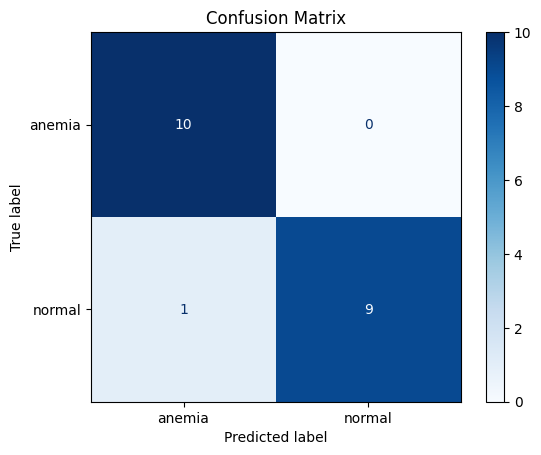

In [72]:
acc, report = evaluate_model(y_pred, y_test, CLASS_NAMES)

In [73]:
print("Waktu Komputasi:")
WaktuKomputasi.toc()

Waktu Komputasi:
Elapsed time is 8.706241 seconds.
